# <font color=royalblue>Matplotlib チュートリアル</font>

## <font color=royalblue> ０.はじめに </font>

本稿は、Matplotlibの公式ホームページのチュートリアルにある初級編（Introductory）の５つを翻訳、修正したものです。  

+ クイックスタートガイド
+ Pyplotチュートリアル
+ 画像チュートリリアル
+ プロットのライフサイクル
+ スタイルシートとrcParamsでMatplotlibをカスタマイズする

誤訳や誤記がありましたら随時修正していきますので後してをいただけると幸いです。

©️2022 NPO法人AI開発推進協会

これらのチュートリアルでは、Matplotlib を使用してビジュアライゼーションを作成する基本と、パッケージを効果的に使用するためのベスト プラクティスについて説明します。

## <font color=royalblue>1.クイックスタートガイド</font>

このチュートリアルでは、Matplotlib を使い始めるのに役立ついくつかの基本的な使用パターンとベスト プラクティスについて説明します。

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### <font color=royalblue>1.1 簡単な例</font>

Matplotlibはデータを[Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) (ウィンドウ、Jupyterウィジェットなど)上にグラフ化します。Figureはそれぞれ1つ以上の[Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)、x-y座標で点を指定できるエリア(極プロットではtheta-r、3Dプロットではx-y-zなど)を持つことができます。Axesを持つFigureを作成する最も簡単な方法は、[`pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)を使用することです。そして、[`Axes.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)を使ってAxes上にデータを描画します。

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

### <font color=royalblue>1.2 図のパーツ</font>

以下は、Matplotlibの図の構成要素です。

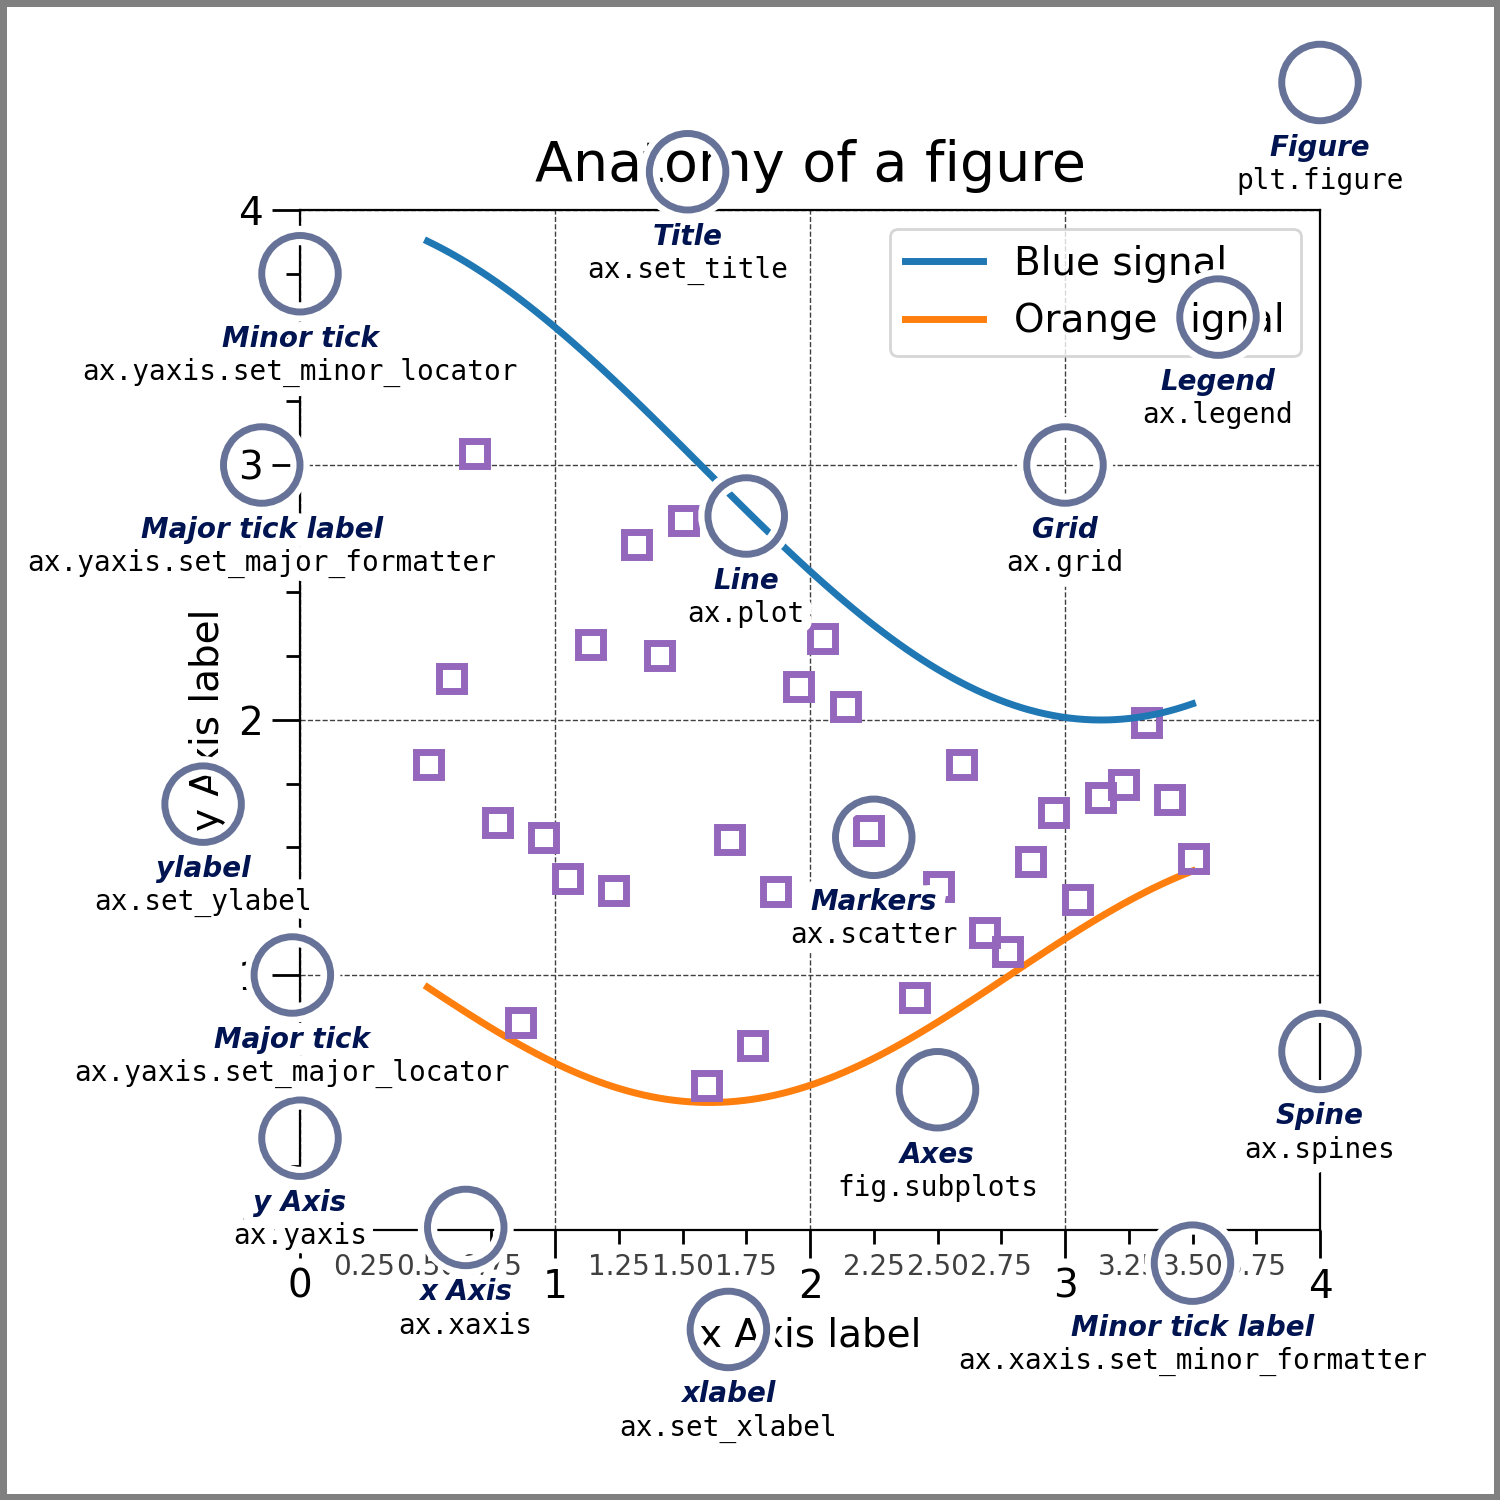

#### [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)


図全体です。Figureはすべてのchild [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)、'特別な'Artistのグループ（タイトル、図の凡例、カラーバーなど）、さらにはネストしたSub Figureの記録を保持します。

新しいFigureを作成する最も簡単な方法は、pyplotを使用することです。


In [ ]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

Figure と一緒に Axes を作成すると便利なことがよくありますが、後で手動で Axes を追加することもできます。多くの[Matplotlibバックエンド](https://matplotlib.org/stable/users/explain/backends.html)は、Figure ウィンドウでの zooming と panning をサポートしていることに注意してください。

#### [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)

Axesはデータをプロットするための領域を含むFigureに付属するArtistで、通常2つ（3Dの場合は3つ）の[Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis)オブジェクト（AxesとAxisの違いに注意）を含み、目盛りと目盛りラベルを提供してAxes内のデータにスケールを提供します。各 [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) は、タイトル ( [set_title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title) で設定)、x-label ([set_xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel)) で設定、および y-label ([set_ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel) で設定) を持ちます。  
  
[Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) クラスとそのメンバ関数は、OOP インターフェースで作業するための主要なエントリポイントであり、ほとんどのプロットメソッドが定義されています（例えば、上図の `ax.plot()` は [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) メソッドを使用しています）。

#### [Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis)

これらのオブジェクトはスケールとリミットを設定し、目盛（Axis 上のマーク）と目盛り記号（目盛りにラベルを付けた文字列）を生成します。目盛りの位置は [Locator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Locator) オブジェクトによって決定され、目盛りラベルの文字列は [Formatter](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter) によってフォーマットされます。正しい [Locator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Locator) と [Fomatter](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter) を組み合わせることで、目盛りの位置とラベルを非常に細かく制御することができます。

#### [Artist](https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist)

基本的に、Figure上で見えるものはすべてArtistです（ [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)、 [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)、 [Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis)オブジェクトも）。これには、[Text](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text)オブジェクト、 [Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)オブジェクト、 [collection](https://matplotlib.org/stable/api/collections_api.html#module-matplotlib.collections)オブジェクト、 [Patch](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch)オブジェクトなどが含まれます。Figureがレンダリングされると、すべてのArtistが `canvas` に描画されます。ほとんどのArtistはAxesと結びついており、そのようなArtistは複数のAxesで共有したり、1つから別のものに移動したりすることはできません。

### <font color=royalblue>1.3 プロット関数の入力の種類</font>

プロット関数は、入力として [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) または [numpy.ma.masked_array](https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_array.html#numpy.ma.masked_array) を、あるいは [numpy.asarray](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html#numpy.asarray) に渡すことができるオブジェクトを想定しています。[pandas](https://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas) data objects や [numpy.matrix](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix) のような配列に似たクラス('array-like')は、意図したように動作しないかもしれません。一般的な慣例では、描画の前にこれらを [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) オブジェクトに変換します。例えば、 [numpy.matrix](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix) を変換するには、以下のようにします。

In [ ]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

ほとんどのメソッドは、dict、[numpy.recarray](https://numpy.org/doc/stable/reference/generated/numpy.recarray.html#numpy.recarray)、[pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) のようなアドレス指定可能なオブジェクトもパースすることができます。Matplotlib では、`data` キーワード引数を与え、x と y 変数に対応する文字列を渡してプロットを生成することができます。

In [ ]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

#fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

### <font color=royalblue>1.4 コーディングスタイル</font>

#### 明示的インターフェースと暗黙的インターフェース

前述のように、Matplotlibの使い方には、基本的に2つの方法があります。

+ 明示的にFigureとAxesを作成し、それらのメソッドを呼び出す（"オブジェクト指向（OO）スタイル"）。

+ 暗黙のうちにFigureとAxesを作成・管理し、プロットにはpyplotの関数を使用するために、pyplotに依存する。

暗黙的インターフェースと明示的インターフェースのトレードオフの説明については [Matplotlib Application Interfaces (APIs)](https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces) を参照してください。

オブジェクト指向(OO)スタイルを使用したとき、


In [ ]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
#fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

または、pyplot-styleのとき、

In [ ]:
x = np.linspace(0, 2, 100)  # Sample data.

#plt.figure(figsize=(5, 2.7), layout='constrained')
plt.figure(figsize=(5, 2.7), constrained_layout=True)
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

(さらに、GUIアプリケーションにMatplotlibを埋め込む場合の第3のアプローチとして、図の作成も含めてpyplotを完全に削除する方法があります。詳しくはギャラリーの該当セクションをご覧ください:[グラフィカル・ユーザー・インターフェースに Matplotlib を埋め込む](https://matplotlib.org/stable/gallery/user_interfaces/index.html#user-interfaces)。)

Matplotlibのドキュメントとサンプルは、OOとpyplotの両方のスタイルを使用しています。一般的に、特に複雑なプロットや、大きなプロジェクトの一部として再利用されることを意図した関数やスクリプトには、OOスタイルを使用することをお勧めします。しかし、pyplotスタイルは、素早いインタラクティブな作業には非常に便利です。

::: note 

古い例では、`pylab` interface を使って、`from pylab import *` を経由しているものがあるかもしれません。  
このアプローチは強く非推奨です。  
:::

### <font color=royalblue>1.5 ヘルパー関数の作成 </font>

異なるデータセットで何度も同じプロットを作成する必要がある場合、または Matplotlib のメソッドを簡単にラップしたい場合は、以下の推奨シグネチャ関数を使用してください。

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out


これを 2 回使用して、2 つのサブプロットを作成します。

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

もし、これらを python パッケージとしてインストールしたい場合や、その他のカスタマイズをしたい場合は、ウェブ上にある多くのテンプレートのうちの一つを使うことができることに注意してください; Matplotlib には [`mpl-cookiecutter`](https://github.com/matplotlib/matplotlib-extension-cookiecutter) というテンプレートがあります。

### <font color=royalblue>1.6 Artistsのスタイリング </font>

ほとんどのplottingメソッドは、plottingメソッドが呼ばれたとき、または、Artistの `setter` からアクセスできるArtistのスタイルオプションを持っています。以下のプロットでは、[`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)によって作られたArtistの色(color)、線幅(linewidth)、ラインスタイル(linestyle)を手動で設定し、2行目のラインスタイルを[`set_linestyle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)で後から設定(`set_linestyle(':')`)しています。

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

#### 色

Matplotlib は、ほとんどのArtistsに受け入れられる、非常に柔軟な色の配列を持っています。仕様の一覧は、[カラーチュートリアル](https://matplotlib.org/stable/tutorials/colors/colors.html)をご覧ください。例えば、[散布図(scatter)](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)では、マーカの端と内側を異なる色にすることができます。

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

#### 線幅(Linewidths)、ラインスタイル(linestyles)、マーカーサイズ(markersizes)

線幅は通常タイポグラフィポイント（1pt＝1/72インチ）で、ストロークラインを持つArtistsに利用可能です。同様に、ストロークラインはラインスタイルを持つことができます。[linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)の例を参照してください。
  
マーカーサイズは使用する方法によって異なります。[plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) はマーカーサイズをポイントで指定し、一般にマーカーの「直径」または「幅」になります。マーカースタイルの配列は文字列コードで提供されており ([markes](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)を参照)、またユーザが独自の [MarkerStyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle) を定義することもできます ([マーカーリファレンス](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)を参照)。

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

### <font color=royalblue>1.7 ラベリングプロット </font>

#### Axesのラベルとテキスト

[`set_xlabel`](), [`set_ylabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel), [`set_title`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title) は、指定された場所にテキストを追加するために用いられます（より詳しい説明は、 [Matplotlib プロットにおけるテキスト](https://matplotlib.org/stable/tutorials/text/text_intro.html) を参照してください）。また、テキストは、[text](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text) を用いて直接プロットに追加することもできます

In [ ]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
#fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

すべての [`text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text) 関数は、 [`matplotlib.text.Text`](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text) のインスタンスを返します。上の行と同様に、キーワード引数をテキスト関数に渡すことで、プロパティをカスタマイズすることができます。

In [ ]:
t = ax.set_xlabel('my data', fontsize=14, color='red')

これらのプロパティについては、[テキストプロパティとレイアウト](https://matplotlib.org/stable/tutorials/text/text_props.html)で詳しく説明します。

#### テキスト中の数式の使用

Matplotlib は、任意のテキスト表現で `TeX` 式を受け付けます。例えば、タイトルに式($\sigma_i = 15$)を書くには、`$`記号で囲まれた `TeX` 式を書きます。

In [ ]:
ax.set_title(r'$\sigma_i=15$')

ここで、タイトル文字列の前の `r` は、その文字列が raw の文字列であり、バックスラッシュを Python のエスケープとして扱わないことを意味します。Matplotlib は組み込みの TeX 式パーサとレイアウトエンジンを持ち、独自の数学フォントを同梱しています - 詳しくは [Writing mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html) をご覧ください。また、LaTeXを直接使ってテキストをフォーマットし、その出力を直接表示図や保存されたポストスクリプトに取り込むことができます - [LaTeXによるテキストレンダリング](https://matplotlib.org/stable/tutorials/text/usetex.html)を参照してください。

#### 注釈(Annotations)

また、プロット上の点に注釈をつけることもできます。多くの場合、`xy` を指す矢印を `xytext` の位置にあるテキストの一部と結びつけることによって、注釈をつけることができます。

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

この基本的な例では、`xy` と `xytext` の両方がデータ座標系である。詳しくは[基本的なアノテーション](https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial)と[高度なアノテーション](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation)を参照してください。その他の例は、[プロットへの注釈](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html)にあります。

#### 凡例(Legends)

[`Axes.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend) を使用して線やマーカーを識別したいことがよくあります。

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

Matplotlibの凡例は、レイアウトや配置、表現できるArtistsがかなり柔軟です。これらは [Legend guide](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html) で詳しく説明されています。

### <font color=royalblue>1.8 Axisの目盛りと刻み </font>

各 Axes は x -と y- 軸(axis)を表す 2 つ（または 3 つ）の [`Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) オブジェクトを持ちます。これらは Axis のスケール、目盛り位置、目盛りフォーマッタを制御します。さらにAxisオブジェクトを表示するために、追加のAxesを加えることができます。

#### スケール

線形スケールに加えて、Matplotlib は対数スケールのような非線形のスケールも提供します。対数スケールは非常によく使われるので， [`loglog`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.loglog.html#matplotlib.axes.Axes.loglog)， [`semilogx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogx.html#matplotlib.axes.Axes.semilogx)， [`semilogy`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogy.html#matplotlib.axes.Axes.semilogy)] のような直接的な手法も存在します。スケールには多くの種類があります（他の例については [`Scales`](https://matplotlib.org/stable/gallery/scales/scales.html) を参照してください）。ここでは、スケールを手動で設定します。

In [ ]:
#fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), constrained_layout=True)
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

scale は、データ値から Axis に沿った間隔へのマッピングを設定します。これは両方向で起こり、Matplotlib がデータ座標から Axes, Figure, またはスクリーン座標にマッピングする方法である `transform` に結合されます。[Transformチュートリアル](https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html)を参照してください。

#### ティックロケーターとフォーマッター

各 Axis には目盛り位置決め機能とフォーマッタがあり、Axis オブジェクトに沿ったどこに目盛りを付けるかを選択します。これに対する簡単なインターフェイスが [`set_xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks) です。

In [ ]:
#fig, axs = plt.subplots(2, 1, layout='constrained')
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')
  
axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

たとえば、上記のログスケールでは [`LogLocator`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogLocator) と [`LogFormatter`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogFormatter) を使用しています。その他のフォーマッタやロケータ、および独自のものを書くための情報については [Tick ロケータ](https://matplotlib.org/stable/gallery/ticks/tick-locators.html) と [Tick フォーマッタ](https://matplotlib.org/stable/gallery/ticks/tick-formatters.html) を参照してください。

#### 日付と文字列のプロット

Matplotlib は、浮動小数点数だけでなく、日付の配列や文字列の配列の描画を扱うことができます。これらは，必要に応じて特別なロケータとフォーマッタを得ます。日付の場合、

In [ ]:
#fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

詳細については、日付の例を参照してください (例: [日付の目盛りラベル](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

文字列の場合、カテゴリのプロットができます ([カテゴリ変数のプロット](https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html)を参照してください)。

In [ ]:
#fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)));

カテゴリプロットに関する1つの注意点は、テキストファイルを解析するいくつかの方法は、たとえ文字列がすべて数字や日付を表していても、文字列のリストを返すということです。もし 1000 個の文字列を渡したら、Matplotlib は 1000 個のカテゴリを意味すると思って、プロットに 1000 個の目盛りを追加してしまうでしょう!

#### Axisオブジェクトの追加

異なる大きさのデータを1つのグラフにプロットする場合、追加のY軸(axis)が必要になることがあります。このような軸(Axis)は、[`twinx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html#matplotlib.axes.Axes.twinx) を使って、見えない x 軸(axis)と右に配置された y 軸(axis)を持つ新しいAxesを追加することで作成できます（[`twiny`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twiny.html#matplotlib.axes.Axes.twiny) の場合と同様）。他の例として、[異なるスケールを持つプロット](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html) を見てください。

同様に、主軸(Axis)とは異なるスケールを持つ [`secondary_xaxis`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.secondary_xaxis.html#matplotlib.axes.Axes.secondary_xaxis) や [`secondary_yaxis`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.secondary_yaxis.html#matplotlib.axes.Axes.secondary_yaxis) を追加して、異なるスケールや単位でデータを表現することができます。その他の例は、[セカンダリAxis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html) を参照してください。

In [ ]:
#fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), constrained_layout=True)
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

### <font color=royalblue>1.9 カラーマップデータ</font>

しばしば、カラーマップの色で表現されたプロットの3次元を持ちたいと思うことがあります。Matplotlib には、これを実現するためのプロットタイプがいくつかあります。

In [ ]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

#fig, axs = plt.subplots(2, 2, layout='constrained')
fig, axs = plt.subplots(2, 2, constrained_layout=True)
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

#### カラーマップ(Colormaps)

これらはすべて [`ScalarMappable`](https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.ScalarMappable) オブジェクトから派生したアーティストの例である。これらはすべて、cmap で指定されたカラーマップに `vmin` と `vmax` の間の線形マッピングを設定することができます。Matplotlib には多くのカラーマップがあり、そこから選ぶことができます（[`Choosing Colormaps in Matplotlib`](https://matplotlib.org/stable/tutorials/colors/colormaps.html))、 自分で作ることもできます（[Creating Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html）))、 [サードパーティパッケージ](https://matplotlib.org/mpl-third-party/#colormaps-and-styles)としてダウンロードすることもできます。

#### 正規化（Normalizations）

上の `LogNorm` の例のように、データからカラーマップへの非線形マッピングが必要な場合があります。これは， `vmin` と `vmax` の代わりに `norm` を引数としてScalarMappableに与えることで実現される．その他の正規化については、[カラーマップ正規化](https://matplotlib.org/stable/tutorials/colors/colormapnorms.html)を参照してください。

#### カラーバー（Colorbars）

[colorbar](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.colorbar)を追加すると、カラーを基礎データに関連付けるためのキーが得られます。カラーバーは図形レベルのアーティストで、ScalarMappable（ここでノルムとカラーマップの情報を得る）に取り付けられ、通常、親のAxesからスペースを奪います。カラーバーの配置は複雑になることがあります。詳しくは[カラーバーの配置](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html)を参照してください。また、`extend` キーワードで両端に矢印を追加したり、 `shrink` や `aspect` でサイズを制御して、カラーバーの外観を変更することができます。最後に、カラーバーには、標準に適したデフォルトのロケータとフォーマッタがあります。これらは、他のAxisオブジェクトと同様に変更することができます。

### <font color=royalblue>1.10 複数のFigure(図)とAxesの操作</font>

`fig = plt.figure()` または `fig2, ax = plt.subplots()` を複数回呼び出すことにより、複数のFigureを開くことができます。オブジェクトの参照を維持することによって、どちらのFigureにもArtistsを追加することができます。
  
複数のAxesを追加する方法はいくつかありますが、最も基本的なのは、上で使用した `plt.subplots()` です。[`subplot_mosaic`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html#matplotlib.pyplot.subplot_mosaic) を使用すると、Axesオブジェクトが列や行にまたがるような、より複雑なレイアウトを実現することができます。  
<font color=purple>✳︎Colab環境では、下記のコードは「module 'matplotlib.pyplot' has no attribute 'subplot_mosaic'」エラーで実行できません</font>

In [ ]:
''' エラーのためコメントアウト
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')

axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');
'''

Matplotlib は、Axesを配置するための非常に洗練されたツールを持っています。[図形内に複数のAxesを配置し、複雑で意味のあるFigure構成を作成する](https://matplotlib.org/stable/tutorials/provisional/mosaic.html)を参照してください。

### <font color=royalblue>その他の読み物</font>

その他のプロットタイプについては、[Plot types](https://matplotlib.org/stable/plot_types/index.html) および [APIリファレンス](https://matplotlib.org/stable/api/index.html)、特に [Axes API](https://matplotlib.org/stable/api/axes_api.html)を参照してください。

## <font color=royalblue>2.Pyplot チュートリアル</font>

pyplot インターフェースの紹介です。Matplotlib の動作の概要については [クイックスタートガイド](#クイックスタートガイド) を、サポートされるユーザAPI間のトレードオフについては [Matplotlib Application Interfaces (APIs)](https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces) もご覧ください。

### <font color=royalblue>2.1 Intro to pyplot</font>

[matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot) は matplotlib を MATLAB のように動作させるための関数のコレクションです。それぞれの `pyplot` 関数は、図(Figure)に何らかの変更を加えます：例えば、図の作成、図の中のプロット領域の作成、プロット領域でのいくつかの線のプロット、ラベルによるプロットの装飾、などなどです。

[matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot) では、現在の図やプロット領域のようなものを追跡し、プロット関数が現在のaxesに向けられるように、様々な状態が関数呼び出しにわたって保持されます（ここやドキュメントのほとんどの場所で、「axes」は [figureのaxes部分](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#figure-parts)を指し、複数のaxisに対する厳密な数学用語ではないことに注意してください）。

::: note  
暗黙的なpyplot APIは一般に冗長ではありませんが、明示的なAPIほど柔軟ではありません。ここで見るほとんどの関数呼び出しは、`Axes` オブジェクトからメソッドとして呼び出すこともできます。チュートリアルやサンプルを見て、これがどのように動作するかを確認することをお勧めします。サポートされるユーザAPIのトレードオフの説明については [Matplotlib Application Interfaces (APIs)](https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces) を参照してください。  
:::

pyplotによるビジュアライゼーションの生成は非常に高速です。

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

なぜ x 軸(axis)が 0〜3 の範囲で、y 軸(axis)が 1〜4 の範囲なのか不思議に思うかもしれません。[plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)するリストや配列を1つ指定すると、matplotlib はそれを一連の y 値であるとみなし、自動的に x 値を生成します。Python の範囲は 0 から始まるので、デフォルトの x ベクトルは y と同じ長さですが 0 から始まります。したがって、x データは `[0, 1, 2, 3]` です。
  
[plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) は多機能な関数で、任意の数の引数を取ることができます。例えば、x と y の関係をプロットするには、次のように書きます。

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

#### プロットのスタイルをフォーマットする

引数の x, y の組ごとに、オプションの第3引数があり、それはプロットの色と線種を示す書式文字列です。フォーマット文字列の文字と記号は MATLAB のものであり、色文字列と線種文字列を連結します。デフォルトの書式文字列は 'b-' で、これは青の実線です。例えば、赤い丸で上記をプロットするには、次のように発行します。

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

線種と書式文字列の完全なリストについては、[plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) のドキュメントを参照してください。上の例のaxis関数は、`[xmin, xmax, ymin, ymax]` のリストを受け取り、axesのビューポートを指定します。

もし matplotlib がリストの操作に限定されるなら、数値処理にはかなり役立たずになるでしょう。一般的には、numpy 配列を使用することになります。実際、すべての配列は、内部で numpy 配列に変換されます。以下の例では、配列を使用して1つの関数呼び出しで異なる書式スタイルの複数の線をプロットしています。

In [ ]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### <font color=royalblue>2.2 キーワード文字列を用いたプロット</font>

特定の変数に文字列でアクセスできるような形式のデータがある場合があります。例えば、[`numpy.recarray`](https://numpy.org/doc/stable/reference/generated/numpy.recarray.html#numpy.recarray) や [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) のようなものです。

Matplotlib では、このようなオブジェクトを `data` キーワード引数で指定することができます。提供されている場合、これらの変数に対応する文字列でプロットを生成することができます。

In [ ]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### <font color=royalblue>2.3 カテゴリ変数でのプロット</font>

また、カテゴリ変数を使ってプロットを作成することも可能です。Matplotlib では、多くのプロット関数に直接カテゴリ変数を渡すことができます。例えば、

In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

### <font color=royalblue>2.4 線のプロパティを制御する</font>

線は、線幅、ダッシュスタイル、アンチエイリアスなど、設定可能な多くの属性を持っています。 [`matplotlib.lines.Line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) を参照してください。線の属性を設定するには、いくつかの方法があります。


+ キーワード引数を使用する

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
x1 = [1, 2, 3] ; x2 = [1.5, 2.5, 3.5]
y1 = [4, 5, 6] ; y2 = [4, 5, 6]

In [ ]:
plt.plot(x, y, linewidth=2.0)

+ `Line2D` インスタンスの setter メソッドを使用します。 `plot` は `Line2D` オブジェクトのリストを返します。 例: `line1, line2 = plot(x1, y1, x2, y2)` 。 以下のコードでは、返されるリストの長さが 1 になるように、行が 1 つだけあると仮定します。 `line`でタプル アンパックを使用して、そのリストの最初の要素を取得します。

In [ ]:
line, = plt.plot(x, y)
line.set_antialiased(False) # turn off antialiasing

+ `setp` を使用します。 以下の例では、MATLAB スタイルの関数を使用して、行のリストに複数のプロパティを設定します。 `setp` は、オブジェクトのリストまたは単一のオブジェクトを透過的に処理します。 Python キーワード引数または MATLAB スタイルの文字列/値のペアのいずれかを使用できます。

In [ ]:
lines = plt.plot(x1, y1, x2, y2)
# use keyword arguments
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

Line2Dで使用可能なプロパティは以下の通りです。

|Property       | Value Type|
|:-------------------|:--------------|
|alpha |float |
|animated |[True \| False] |
|antialiased or aa |[True \| False] |
|clip_box |a matplotlib.transform.Bbox instance |
|clip_on |[True \| False] |
|clip_path |a Path instance and a Transform instance, a Patch |
|color or c |any matplotlib color |
|contains |the hit testing function |
|dash_capstyle |`['butt' \| 'round' \| 'projecting']`|
|dash_joinstyle |`['miter' \| 'round' \| 'bevel']` |
|dashes |sequence of on/off ink in points |
|data |(np.array xdata, np.array ydata) |
|figure |a matplotlib.figure.Figure instance |
|label |any string |
|linestyle or ls |`[ '-' \| '--' \| '-.' \| ':' \| 'steps' \| ...]` |
|linewidth or lw |float value in points |
|marker |`[ '+' \| ',' \| '.' \| '1' \| '2' \| '3' \| '4' ]` |
|markeredgecolor or mec |any matplotlib color |
|markeredgewidth or mew |float value in points |
|markerfacecolor or mfc |any matplotlib color |
|markersize or ms |float |
|markevery |`[ None \| integer \| (startind, stride) ]` |
|picker |used in interactive line selection |
|pickradius |the line pick selection radius |
|solid_capstyle |`['butt' \| 'round' \| 'projecting']` |
|solid_joinstyle |`['miter' \| 'round' \| 'bevel']` |
|transform |a matplotlib.transforms.Transform instance |
|visible |`[True \| False]` |
|xdata |np.array |
|ydata |np.array |
|zorder |any number |
  


設定可能な line プロパティのリストを取得するには、line または lines を引数として `setp` 関数を呼び出します。
  
>
>In [69]: lines = plt.plot([1, 2, 3])  
>  
>In [70]: plt.setp(lines)  
>  alpha: float  
>  animated: [True | False]  
>  antialiased or aa: [True | False]  
>  ...snip  


### <font color=royalblue>2.5 複数のFigureやAxesを扱う</font>

MATLAB と [pyplot](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot) には、現在の 図(figure) と現在の軸(axes)の概念があります。 すべてのプロット関数は現在のaxesに適用されます。 関数 [gca](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib.pyplot.gca) は現在のaxes ([matplotlib.axes.Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) インスタンス) を返し、 [gcf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gcf.html#matplotlib.pyplot.gcf) は現在の figure ([matplotlib.figure.Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) インスタンス) を返します。 通常、これについて心配する必要はありません。すべてが舞台裏で処理されているからです。 以下は、2 つのサブプロットを作成するスクリプトです。

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

figureが存在しなければ、 Axes が存在しなければ作成されるのと同様に (明示的な subplot() 呼び出しと同等) 、figureは生成されるため、ここでの `figure` 呼び出しはオプションです。[`subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot) 呼び出しは `numrows`, `numcols`, `plot_number` を指定し、`plot_number` は 1 から `numrows*numcols` までの範囲です。`numrows*numcols<10` ならば subplot 呼び出しのカンマはオプションです。従って、`subplot(211) `は `subplot(2, 1, 1)` と同じです。

サブプロットやAxesは任意の数だけ作成することができます。Axes を手動で、つまり、長方形のグリッド上ではなく、配置したい場合は、[`axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html#matplotlib.pyplot.axes) を使用します。これは、すべての値が小数（0 から 1）の座標である `axes([left, bottom, width, height])` として位置を指定することが可能です。Axesを手動で配置する例については[Axesのデモ](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axes_demo.html)を、サブプロットがたくさんある例については[複数のサブプロット](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot.html)を参照してください。

図の番号を増やした複数の [`figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure) 呼び出しを使用することで、複数のfigure を作成することができます。もちろん、各figureには、axesやサブプロットを好きなだけ入れることができます。

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default

plt.figure(1)                # first figure current;
                             # subplot(212) still current
plt.subplot(211)             # make subplot(211) in the first figure
                             # current
plt.title('Easy as 1, 2, 3') # subplot 211 title

現在の図(figure)は [`clf`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.clf.html#matplotlib.pyplot.clf) で、現在の軸(axes)は [`cla`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.cla.html#matplotlib.pyplot.cla) でクリアできます。もし、状態（特に、現在の画像、図、軸）が裏で管理されているのが煩わしいと感じるなら、絶望する必要はありません。これは、オブジェクト指向のAPIの薄いステートフルラッパーに過ぎないので、代わりにそれを使うことができます（[Artist チュートリアル](https://matplotlib.org/stable/tutorials/intermediate/artists.html)を参照）。

たくさんの図(figure)を作成する場合、もう一つ注意する必要があります。図に必要なメモリは、明示的に [close](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.close.html#matplotlib.pyplot.close) で閉じるまで完全に解放されません。図への参照をすべて削除したり、ウィンドウマネージャを使って図が画面に表示されているウィンドウを消しても、十分ではありません。なぜなら、pyplotは [`close`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.close.html#matplotlib.pyplot.close) が呼ばれるまで内部参照を維持するからです。

### <font color=royalblue>2.6 テキストの操作</font>

[`text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html#matplotlib.pyplot.text) は，任意の位置にテキストを追加するために用いられ， [`xlabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel), [`ylabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel), [`title`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title) は，指示された位置にテキストを追加するために用いられます（より詳細な例は， [Matplotlibプロットにおけるテキスト](https://matplotlib.org/stable/tutorials/text/text_intro.html) を参照してください）。

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

すべての [`text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html#matplotlib.pyplot.text)関数は、 [matplotlib.text.Text](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text) のインスタンスを返します。上の行と同様に、テキスト関数にキーワード引数を渡したり、 [`setp`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.setp.html#matplotlib.pyplot.setp) を使ったりすることで、プロパティをカスタマイズすることができます。


In [ ]:
t = plt.xlabel('my data', fontsize=14, color='red')

これらのプロパティについては、[テキストプロパティとレイアウト](https://matplotlib.org/stable/tutorials/text/text_props.html)で詳しく説明します。

#### 文章中の数式の使用

matplotlib は、任意のテキスト表現で TeX 方程式を受け付けます。例えば、タイトルに $\sigma_i=15$ という式を書くには、ドル記号で囲まれた TeX 式を書けばよいのです。

In [ ]:
plt.title(r'$\sigma_i=15$')

タイトル文字列の前にある `r ` は重要です。これは、文字列がrawの文字列であり、バックスラッシュを Python エスケープとして扱わないことを意味します。 matplotlib には組み込みの TeX 式パーサーとレイアウト エンジンがあり、独自の数学フォントが付属しています。詳細については、[数式の記述](https://matplotlib.org/stable/tutorials/text/mathtext.html)を参照してください。 したがって、TeX のインストールを必要とせずに、プラットフォーム間で数学テキストを使用できます。 LaTeX と dvipng がインストールされている場合は、LaTeX を使用してテキストをフォーマットし、直接図を表示したり保存したポストスクリプトに組み込むこともできます -- [LaTeX によるテキストのレンダリング](https://matplotlib.org/stable/tutorials/text/usetex.html)を参照してください。

#### テキストに注釈をつける

上記の基本的な [`text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html#matplotlib.pyplot.text)関数の用途は、Axes上の任意の位置にテキストを配置するものです。テキストの一般的な使用法は、プロットのある特徴に注釈をつけることであり、[`annotate`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib.pyplot.annotate)メソッドは注釈を簡単にするためのヘルパー機能を提供します。注釈では、考慮すべき2つのポイントがあります：引数 `xy` で表される注釈される位置と、テキストの位置 `xytext` です。これらの引数は両方とも `(x, y)` のタプルです。

In [ ]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

この基本的な例では、`xy` （矢印の先端）と `xytext` （テキストの位置）の両方がデータ座標で表示されています。他にも様々な座標系を選択することができます。詳しくは [基本的なアノテーション](https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial)と[高度なアノテーション](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation)をご覧ください。その他の例は、[プロットへの注釈](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html)にあります。

#### 対数などのその他非線形軸(Axes)

matplotlib.pyplot は、線形axisのスケールだけでなく、対数やロジットのスケールもサポートしています。これは、データが多くの桁にまたがる場合によく使われます。axisのスケールを変更するのは簡単です。

In [ ]:
plt.xscale('log')

同じデータで、Y軸(axis)のスケールが異なる4つのプロットの例を以下に示します。

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"

#plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
#                    wspace=0.35)

# colab上では hspace=0.25ではxラベルとタイトルが被るので、 hspace=0.35に修正
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)

plt.show()

また、独自のスケールを追加することも可能です。詳しくは [matplotlib.scale](https://matplotlib.org/stable/api/scale_api.html#module-matplotlib.scale) を参照してください。

## <font color=royalblue>3.画像チュートリアル</font>

Matplotlibを使った画像のプロットに関する短いチュートリアルです。

### <font color=royalblue>3.1 起動コマンド</font>

まず、IPythonを始めましょう。IPythonは標準的なPythonプロンプトの最も優れた拡張機能であり、特にMatplotlibとうまく連携しています。IPython はシェルで直接起動するか、Jupyter Notebook (IPython を実行カーネルとする) で起動します。

IPythonが起動したら、今度はGUIのイベントループに接続する必要があります。これはIPythonにプロットを表示する場所（と方法）を指示します。GUIループに接続するには、IPythonのプロンプトで `%matplotlib` マジックを実行します。これが何をするのかについては、[IPythonのGUIイベントループに関するドキュメント](https://ipython.readthedocs.io/en/stable/interactive/reference.html#gui-event-loop-support)に詳細があります。

Jupyter Notebookを使用している場合、同じコマンドが利用可能ですが、一般的に%matplotlibマジックに特定の引数を使用します。

In [ ]:
In [1]: %matplotlib inline

これにより、インラインプロットが有効になり、プロットされたグラフィックがノートブックに表示されるようになります。このことは、対話性にとって重要な意味を持ちます。インラインプロットでは、プロットを出力するセルの下のセルでのコマンドはプロットに影響を与えません。例えば、カラーマップを変更することは、プロットを作成するセルの下のセルからはできません。しかし、Qt のような、別のウィンドウを開く他のバックエンドでは、プロットを作成するセルより下のセルはプロットを変更します - それはメモリ内の生きたオブジェクトなのです。

このチュートリアルでは、Matplotlib の暗黙のプロットインターフェースである pyplot を使用します。このインターフェースはグローバルな状態を維持し、様々なプロット設定を素早く簡単に実験するのに非常に便利です。もう一つの選択肢は明示的なもので、これは大規模なアプリケーション開発に適しています。implicit と explicit のトレードオフの説明については [Matplotlib Application Interfaces (APIs)](https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces) と explicit インターフェースを使い始めるための[クイックスタートガイド](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)を参照してください。とりあえず、暗黙的なアプローチに取り掛かりましょう。

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### <font color=royalblue>3.2 画像データのNumpy配列への取り込み</font>

Matplotlibは、画像データの読み込みにPillowライブラリを利用しています。

再生する画像は次のとおりです。

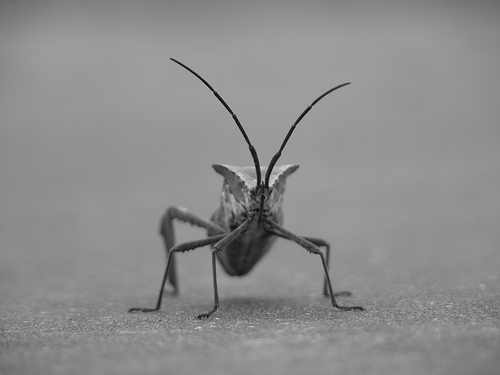

24ビットのRGB PNG画像です（R、G、Bそれぞれ8ビット）。データを入手する場所にもよりますが、他の種類の画像としては、透明度を確保できるRGBA画像や、1チャンネルのグレースケール（輝度）画像に出会うことが多いです。このチュートリアルの続きは、[stinkbug.png](https://raw.githubusercontent.com/matplotlib/matplotlib/main/doc/_static/stinkbug.png) をあなたのコンピュータにダウンロードしてください。

さあ、はじめます...

In [ ]:
#img = mpimg.imread('../../doc/_static/stinkbug.png')
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib/main/doc/_static/stinkbug.png')
print(img)

ここではdtypeに注目してください - float32です。Matplotlibは、各チャンネルの8ビットデータを0.0と1.0の間の浮動小数点データに再尺度化しています。補足として、Pillowが扱うことができるデータ型はuint8だけです。Matplotlibのプロットでは float32 と uint8 が扱えますが、PNG以外の形式の画像の読み書きは uint8 データに限定されます。なぜ 8 ビットなのか？ほとんどのディスプレイは、1チャンネルあたり8ビットの色階調しか描画できません。なぜ8ビット/チャンネルしか描画できないのか？それは、人間の目がそれくらいしか見ることができないからです。詳しくはこちら（写真の観点から）:[Luminous Landscape ビット深度のチュートリアル](https://luminous-landscape.com/bit-depth/)。

各内部リストは、ピクセルを表します。ここでは、RGB画像で、3つの値があります。白黒画像なので、R、G、Bはすべて同じような値です。RGBA（Aはアルファ、つまり透明度）は内部リストごとに4つの値を持ち、単純な輝度画像は1つの値だけです（したがって、3次元配列ではなく2次元配列に過ぎません）。RGB および RGBA 画像に対して，Matplotlib は float32 と uint8 データ型をサポートします。グレースケールに対しては，Matplotlib は float32 のみをサポートしています。配列データがこれらの記述のいずれにも当てはまらない場合，再スケールする必要があります。

### <font color=royalblue>3.3 numpy 配列を画像としてプロットする</font>


データをnumpyの配列に入れます（インポートするか、生成するかのどちらかです）。これをレンダリングしてみましょう。Matplotlib では、これは [`imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow) 関数を用いて行われます。ここでは、plot オブジェクトを取得します。このオブジェクトは、プロンプトからプロットを操作する簡単な方法を提供します。


In [ ]:
imgplot = plt.imshow(img)

また、任意のnumpy配列をプロットすることができます。

#### 画像プロットへの疑似カラー スキームの適用

擬似カラーは、コントラストを強調し、データをより簡単に視覚化するのに有効なツールです。特に、プロジェクタを使用してデータを表示する場合、プロジェクタのコントラストは通常かなり脆弱です。

擬似カラーは、シングルチャンネル、グレースケール、輝度画像にのみ関連します。現在、RGBの画像があります。R、G、Bはすべて類似しているので（上記のデータで確認してください）、配列スライスを使用してデータの1チャンネルを選択するだけです（詳しくは[Numpyチュートリアル](https://numpy.org/doc/stable/user/quickstart.html#indexing-slicing-and-iterating)を参照してください）。

In [ ]:
lum_img = img[:, :, 0]
plt.imshow(lum_img)

明度（2D、無色）の画像には、デフォルトのカラーマップ（別名、ルックアップテーブル、LUT）が、適用されます。デフォルトはviridisと呼ばれるものです。他にもたくさんの種類があります。


In [ ]:
plt.imshow(lum_img, cmap="hot")

既存のプロットオブジェクトのカラーマップを変更するには [`set_cmap()`](https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.ScalarMappable.set_cmap) メソッドを使用することに注意してください。

In [ ]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

::: note  
しかし、インラインバックエンドを持つJupyter Notebookでは、すでにレンダリングされたプロットに変更を加えることができないことを覚えておいてください。もし、あるセルで imgplot を作成したら、後のセルでそれに対して set_cmap() を呼び出し、先のプロットが変更されることを期待することはできません。plt コマンドはそれ以前のセルからのプロットを変更することはできません。  
:::

他にも多くのカラーマップ方式があります。[カラーマップの一覧と画像](https://matplotlib.org/stable/tutorials/colors/colormaps.html)を参照してください。

#### カラースケールの参照

色がどのような値を表しているのかがわかると便利です。図にカラーバーを追加することでそれが可能になります。

In [ ]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

#### 特定のデータ範囲を調べる

画像のコントラストを強調したり、特定の領域のコントラストを拡大する一方で、あまり変化のない、あるいは重要でない色の詳細を犠牲にしたい場合があります。興味深い領域を見つけるのに適したツールが、ヒストグラムです。画像データのヒストグラムを作成するために，関数 [`hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist) を利用します。

In [ ]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

多くの場合、画像の「興味深い」部分はピークの周辺にあり、ピークの上や下の領域をクリッピングすることで、さらにコントラストを高めることができます。このヒストグラムでは、高域に有用な情報があまりないように見えます（画像に白いものがあまりない）。ヒストグラムの一部を効果的に「拡大」するために、上限を調整しましょう。これは imshow に clim 引数を渡すことで行います。これは image plot オブジェクトの [`set_clim()`](https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.ScalarMappable.set_clim) メソッドを呼び出してもできますが、Jupyter Notebook で作業するときは plot コマンドと同じセルで行うようにしてください。 - 以前のセルのプロットを変更することはありません。

`plot` の呼び出しで clim を指定することができます。


In [ ]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

返されたオブジェクトを使用して、clim を指定することもできます。

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

#### アレイ補間方式

補間は、さまざまな数学的スキームに従って、ピクセルの色や値が「どうあるべきか」を計算します。このようなことがよく起こるのは、画像のサイズを変更するときです。画素数は変わるが、同じ情報が欲しい。画素は不連続なので、スペースが足りません。それを補うのが「補間」です。そのため、画像を拡大すると、画素欠けしたように見えることがあります。この現象は、元画像と拡大画像の差が大きいと顕著に現れます。画像を縮小してみましょう。選択した少数のみを保持して、効果的に画素を破棄しています。。これをプロットすると、画面に表示されるサイズに拡大されます。古いピクセルはもう存在しないので、コンピュータはそのスペースを埋めるためにピクセルを描画しなければなりません。

画像の読み込みに使ったPillowライブラリを、画像のサイズ変更にも使ってみましょう。

In [ ]:
from PIL import Image

#img = Image.open('../../doc/_static/stinkbug.png')
# Google Colab向けにコード修正
import io
import requests
img = Image.open(io.BytesIO(requests.get('https://raw.githubusercontent.com/matplotlib/matplotlib/main/doc/_static/stinkbug.png').content))

img.thumbnail((64, 64))  # resizes image in-place
imgplot = plt.imshow(img)

バイキュービック(Bicubic）補間は、写真を拡大するときによく使われます。人々は、ピクセル化されたものよりもぼやけたものを好む傾向があります。

## <font color=royalblue>4.プロットのライフサイクル</font>

このチュートリアルは、Matplotlibを使った単一の可視化の最初、中間、そして終わりを示すことを目的としています。rawデータから始めて、カスタマイズされた可視化の図を保存することで終わります。その過程で、Matplotlib を使ったいくつかの素晴らしい機能やベストプラクティスを紹介します。

::: note  
このチュートリアルは、Chris Moffittによる[素晴らしいブログの投稿](https://pbpython.com/effective-matplotlib.html)を基にしています。このチュートリアルは、Chris Holdgrafの手によって生まれ変わりました。  
:::


### <font color=royalblue>4.1 明示的インターフェースと暗黙的インターフェースに関する注意点</font>

Matplotlib には2つのインタフェースがあります．明示的インターフェースと暗黙的インターフェースのトレードオフの説明については， [Matplotlib Application Interfaces (APIs)](https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces) を参照してください．

明示的なオブジェクト指向（OO）インタフェースでは， [`axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) のインスタンスを直接利用して， [`figure.Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) のインスタンスで可視化を構築しています．暗黙のインターフェイスでは、MATLABに触発され、それをモデルとして、"current Axes "にプロットするために [`pyplot`](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot)モジュールにカプセル化されているグローバルなステートベースのインターフェイスを使用します。pyplotインターフェースをより深く見るには、[pyplotチュートリアル](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)を参照してください。

ほとんどの用語は簡単ですが、覚えておくべき主なものは次のとおりです。

+ 図(Figure)は最終的な画像で、1つ以上の軸(Axes)を含むことができる。

+ Axesは個々のプロットを表します（プロットのx/y軸を指す "axis "と混同しないでください）。

Axesから直接プロットするメソッドを呼び出すことで、プロットをカスタマイズするための柔軟性とパワーを得ることができます。

::: note  
一般に、プロットには暗黙のpyplotインターフェースよりも明示的なインターフェースが好まれます。  
:::

### <font color=royalblue>4.2 使用データ</font>

このチュートリアルの元となった投稿のデータを使用することにします。これは、多くの企業の売上情報を含んでいます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

### <font color=royalblue>4.3 はじめに</font>

このデータは、グループごとに 1 つのバーを持つ棒グラフとして自然に視覚化されます。 オブジェクト指向のアプローチでこれを行うには、最初に [`figure.Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) と [`axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) のインスタンスを生成します。 Figure はキャンバスのようなもので、Axes は特定の視覚化を行うキャンバスの一部です。

::: note  
図(Figure)は、複数の軸(axes)を持つことができます。この方法については、チュートリアルの [Tight Layout](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html) を参照してください。  
:::

In [ ]:
fig, ax = plt.subplots()

Axesインスタンスができたので、その上にプロットすることができます。

In [ ]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

### <font color=royalblue>4.4 スタイルを制御する</font>

視覚化をニーズに合わせて調整できるように、Matplotlib には多くのスタイルが用意されています。 スタイルのリストを表示するには、[`style`](https://matplotlib.org/stable/api/style_api.html#module-matplotlib.style) を使用できます。

In [ ]:
print(plt.style.available)

次の方法でスタイルをアクティブ化できます。

In [ ]:
plt.style.use('fivethirtyeight')

では、上のプロットをリメイクして、どのように見えるか見てみましょう。

In [ ]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

スタイルは、色、線幅、背景など、さまざまなものを制御します。


### <font color=royalblue>4.5 プロットのカスタマイズ</font>

大まかな外観のプロットができましたので、印刷できるように微調整してみましょう。まず、X 軸(axis)のラベルを回転させて、より明確に表示されるようにしましょう。これらのラベルは [`axes.Axes.get_xticklabels()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_xticklabels.html#matplotlib.axes.Axes.get_xticklabels) メソッドでアクセスできます。


In [ ]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

一度に多くのアイテムのプロパティを設定したい場合、pyplot.setp()関数を使用するのが便利です。これは Matplotlib オブジェクトのリスト (または多くのリスト) を受け取り、それぞれのスタイル要素を設定してみます。

In [ ]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

下のラベルの一部が切れたように見えます。Matplotlibに、作成した図形の中に自動的に要素を配置するように指示することができます。これを行うには、rcParamsの `autolayout` の値を設定します。rcParamsを使ったプロットのスタイルやレイアウトなどの制御について詳しくは、[スタイルシートとrcParamsを使ったMatplotlibのカスタマイズ](https://matplotlib.org/stable/tutorials/introductory/customizing.html)を参照してください。

In [ ]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

次に、プロットにラベルを追加します。これを OO インターフェースで行うには、[`Artist.set()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.artist.Artist.set.html#matplotlib.artist.Artist.set) メソッドを用いてこの Axes オブジェクトのプロパティを設定します。

In [ ]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

また、[`pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) 関数を使ってこのプロットのサイズを調整することができます。これは `figsize` キーワード引数で行うことができます。


NumPy のインデックスが (row, column) の形式に従っているのに対し、`figsize` キーワード引数は (width, height) の形式に従っています。これは、残念ながら線形代数とは異なる、可視化における慣習に従ったものです。


In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

ラベルについては、カスタムのフォーマット ガイドラインを関数の形式で指定できます。 以下では、整数を入力として受け取り、文字列を出力として返す関数を定義します。 [`Axis.set_major_formatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html#matplotlib.axis.Axis.set_major_formatter) または [`Axis.set_minor_formatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_minor_formatter.html#matplotlib.axis.Axis.set_minor_formatter) と一緒に使用すると、[`ticker.FuncFormatter`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.FuncFormatter) クラスが自動的に作成されて使用されます。
  
この関数では、引数 `x` は元の目盛りラベルで、`pos` は目盛りの位置です。 ここでは `x` のみを使用しますが、両方の引数が必要です。

In [ ]:
# ticker.Formatterの宣言を追加
import matplotlib.ticker as ticker
@ticker.FuncFormatter
# end
def currency(x, pos):
    """The two arguments are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

そして、この関数をプロット上のラベルに適用することができます。これを行うには、Axesの `xaxis` 属性を使用します。これにより、プロット上の特定のaxisに対してアクションを実行することができます。

In [ ]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)

### <font color=royalblue>4.6 複数のビジュアライゼーションを組み合わせる</font>

同じ [`axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)のインスタンスに複数のプロット要素を描画することが可能です。これを行うには、単にそのaxesオブジェクトの別のplotメソッドの1つを呼び出す必要があります。

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

### プロットの保存

さて、プロットの結果に満足したら、それをディスクに保存したいと思います。Matplotlib には、保存できるファイル形式がたくさんあります。利用可能なオプションの一覧を見るには、以下を使用してください。

In [ ]:
print(fig.canvas.get_supported_filetypes())

そして、その図をディスクに保存するために figure.figure.savefig() を使用することができます。以下に示すように、いくつかの有用なフラグがあることに注意してください。

+ `transparent=True` は、保存された図形の背景を透明にします(フォーマットがサポートしている場合)。

+ `dpi=80` は、出力の解像度(1平方インチあたりのドット数)を制御します。

+ `bbox_inches="tight"`  は、図の境界をプロットにフィットさせます。

In [ ]:
# Uncomment this line to save the figure.
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

## <font color=royalblue>5.スタイルシートとrcParamsでMatplotlibをカスタマイズする</font>

Matplotlibのプロパティとデフォルトスタイルをカスタマイズするためのヒント。

Matplotlibをカスタマイズする方法は3つあります。

> + 実行時に rcParams を設定する
> + スタイルシートの使用
> + matplotlibrc ファイルを変更する

実行時にrcParamsを設定することは、スタイルシートより優先され、スタイルシートは `matplotlibrc` [リンクテキスト](https://)ファイルより優先されます。

### <font color=royalblue>5.1 ランタイムrcの設定 </font>

デフォルトのrc（実行時設定）設定は、pythonスクリプトで、あるいはpythonシェルから対話的に、動的に変更することができます。すべてのrc設定は [matplotlib.rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams) という辞書のような変数に格納されており、これは matplotlib パッケージのグローバルなものです。設定可能なrcParamsの完全なリストは [matplotlib.rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams) を参照してください。rcParamsは、直接修正することができます。 例えば、

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

通常の `plot` カラーを変更するには、axesの `prop_cycle` プロパティを変更する必要があることに注意してください。

In [ ]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.plot(data)  # first color is red

Matplotlib には、rc 設定を変更するための便利な関数もいくつか用意されています。 [`matplotlib.rc`](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rc) を使用すると、キーワード引数を使用して、1 つのグループ内の複数の設定を一度に変更できます。

In [ ]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

#### 一時的なRCの設定

[matplotlib.rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams) オブジェクトは、 [matplotlib.rc_context](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rc_context) コンテキストマネージャを使用して、一時的に変更することもできます。

In [ ]:
with mpl.rc_context({'lines.linewidth': 2, 'lines.linestyle': ':'}):
    plt.plot(data)

[`matplotlib.rc_context`](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rc_context) は、関数内のデフォルトを変更するデコレータとして使用することもできます。

In [ ]:
#@mpl.rc_context({'lines.linewidth': 3, 'lines.linestyle': '-'})
mpl.rc_context({'lines.linewidth': 3, 'lines.linestyle': '-'})
def plotting_function():
    plt.plot(data)

plotting_function()

[`matplotlib.rcdefaults`](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcdefaults)は、Matplotlibの標準的なデフォルト設定を復元します。
  
rcParamsの値を設定する際に、ある程度の検証を行います。詳細は [`matplotlib.rcsetup`](https://matplotlib.org/stable/api/rcsetup_api.html#module-matplotlib.rcsetup)を参照してください。


### <font color=royalblue>5.2 スタイルシートの使用</font>

プロットの見た目を変えるもう一つの方法は、いわゆるスタイルシートにrcParamsを設定し、そのスタイルシートを [`matplotlib.style.use`](https://matplotlib.org/stable/api/style_api.html#matplotlib.style.use) でインポートすることです。この方法では、インポートされたスタイルシートを変更するだけで、異なるスタイルを簡単に切り替えることができます。スタイルシートはmatplotlibrcファイルと同じように見えますが、スタイルシートではプロットの実際のスタイルに関連するrcParamのみを設定することができます。 `matplotlibrc` ファイルはすべてのrcParamをサポートしています。この背後にある論理的根拠は、他のマシンにインストールされているかどうかという依存性を心配することなく、異なるマシン間でスタイルシートを移植できるようにすることです。rcParamsの完全なリストについては [`matplotlib.rcParams`](https://matplotlib.org/stable/api/style_api.html#matplotlib.style.use)を参照してください。スタイルシートで無視されるrcParamsのリストについては [`matplotlib.style.use`](https://matplotlib.org/stable/api/style_api.html#matplotlib.style.use) を参照してください。

[Matplotlibが提供](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)する定義済みのスタイルが多数あります。例えば、"ggplot" という定義済みのスタイルがあり、これは [`ggplot`](https://ggplot2.tidyverse.org/) (R の有名なプロットパッケージ) の美学を模倣しています。このスタイルを使用するには、以下を追加します。

In [ ]:
plt.style.use('ggplot')

利用可能なすべてのスタイルを一覧表示するには、以下を使用します。

In [ ]:
print(plt.style.available)

#### 自分のスタイルを確立する


スタイルシートへのパスまたはURLを指定してstyle.useを呼び出すことで、カスタムスタイルを作成し、それを使用することができます。

例えば、`./images/presentation.mplstyle` を以下のように作成します。  

> axes.titlesize : 24  
> axes.labelsize : 20  
> lines.linewidth : 3  
> lines.markersize : 10  
> xtick.labelsize : 16  
> ytick.labelsize : 16  

次に、論文用に設計されたプロットをプレゼンテーションで見栄えのするプロットに適合させたい場合は、次を追加するだけです。  
  
>  $>>>$ import matplotlib.pyplot as plt  
>  $>>>$ plt.style.use('./images/presentation.mplstyle')

あるいは、`<style-name>.mplstyle` ファイルを `mpl_configdir/stylelib` に配置することによって、スタイルを Matplotlib に知らせることができます。そして、`style.use(<style-name>)` の呼び出しでカスタムスタイルシートをロードすることができます。デフォルトでは `mpl_configdir` は `~/.config/matplotlib` であるべきですが、あなたは [`matplotlib.get_configdir()`](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.get_configdir) でディレクトリの場所を確認できます; このディレクトリを作成する必要があるかもしれません。また、環境変数[`MPLCONFIGDIR`](https://matplotlib.org/stable/users/faq/environment_variables_faq.html#envvar-MPLCONFIGDIR)を設定することによって、Matplotlibがstylelib/folderを探すディレクトリを変更することができます。[matplotlib の構成とキャッシュ ディレクトリの場所](https://matplotlib.org/stable/users/faq/troubleshooting_faq.html#locating-matplotlib-config-dir)を参照してください。

`mpl_configdir/stylelib` にあるカスタムスタイルシートは、スタイルが同じ名前であれば、Matplotlibによって定義されたスタイルシートを上書きすることに注意してください。

ひとたび `<style-name>.mplstyle` ファイルが適切な `mpl_configdir` にあれば、これを使ってスタイルを指定することができます。  
  
> $>>>$ import matplotlib.pyplot as plt  
> $>>>$ plt.style.use(<style-name>)

#### スタイルの構成

スタイルシートは一緒に構成されるように設計されています。 したがって、色をカスタマイズするスタイル シートと、プレゼンテーションの要素サイズを変更する別のスタイル シートを使用できます。 これらのスタイルは、スタイルのリストを渡すことで簡単に組み合わせることができます。  
  
> $>>>$ import matplotlib.pyplot as plt  
> $>>>$ plt.style.use(['dark_background', 'presentation'])  
  
さらに右側のスタイルは、左側のスタイルによって既に定義されている値を上書きすることに注意してください。

#### 一時的なスタイリング

あるスタイルを特定のコード ブロックにのみ使用したいが、グローバルなスタイルを変更したくない場合、スタイル パッケージは変更を特定のスコープに限定するためのコンテキスト マネージャを提供します。スタイルの変更を分離するためには、以下のような書き方をします。

In [ ]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

### <font color=royalblue>5.3 matplotlibrc ファイル</font>

Matplotlibは `matplotlibrc` 設定ファイルを使って、「rc設定」または「rcパラメータ」と呼ぶあらゆる種類のプロパティをカスタマイズしています。図のサイズやDPI、線幅、色、スタイル、Axes、Axisとグリッドのプロパティ、テキストとフォントのプロパティなど、Matplotlibのほぼすべてのプロパティのデフォルトを制御することができます。 `matplotlibrc` は、Matplotlib を設定するために起動時に読み込まれます。Matplotlib は `matplotlibrc` を以下の順序で4つの場所で探します。

+ 現在の作業ディレクトリにある `matplotlibrc`、通常は他の場所に適用したくない特定のカスタマイズのために使用されます。

+ それがファイルであれば`$MATPLOTLIBRC`、そうでなければ `$MATPLOTLIBRC/matplotlibrc`です。

+ 次に、プラットフォームによって、ユーザー固有の場所を探します。
++ LinuxとFreeBSDでは、環境をカスタマイズした場合、`.config/matplotlib/matplotlibrc` (または `$XDG_CONFIG_HOME/matplotlib/matplotlibrc`)を検索します。   
++ 他のプラットフォームでは、 `.matplotlib/matplotlibrc` を探します。

  [matplotlibの設定とキャッシュディレクトリの場所を参照](https://matplotlib.org/stable/users/faq/troubleshooting_faq.html#locating-matplotlib-config-dir)してください。

+ INSTALL/matplotlib/mpl-data/matplotlibrc', ここで INSTALL は Linux では /usr/lib/python3.9/site-packages, Windows では多分 C:\Python39Libsite-packages になります. matplotlibをインストールするたびに、このファイルは上書きされるので、もしカスタマイズを保存したいならば、このファイルをユーザー固有のmatplotlibディレクトリに移動してください。

一旦 matplotlibrc ファイルが見つかると、他のパスは一切検索しません。スタイルシートが `style.use('<path>/<style-name>.mplstyle') ` で与えられるとき、スタイルシートで指定された設定は `matplotlibrc` ファイル内の設定より優先されます。

現在アクティブな `matplotlibrc` ファイルがどこからロードされたかを表示するには、次のようにします。  
  
> $>>>$ vimport matplotlib  
> $>>>$ matplotlib.matplotlib_fname()  
  
matplotlibrcファイルのサンプルは以下を、設定可能なrcParamsの全リストは [matplotlib.rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams) を参照してください。




#### デフォルトの matplotlibrc ファイル

In [ ]:
#### MATPLOTLIBRC FORMAT

## NOTE FOR END USERS: DO NOT EDIT THIS FILE!
##
## This is a sample Matplotlib configuration file - you can find a copy
## of it on your system in site-packages/matplotlib/mpl-data/matplotlibrc
## (relative to your Python installation location).
## DO NOT EDIT IT!
##
## If you wish to change your default style, copy this file to one of the
## following locations:
##     Unix/Linux:
##         $HOME/.config/matplotlib/matplotlibrc OR
##         $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
##     Other platforms:
##         $HOME/.matplotlib/matplotlibrc
## and edit that copy.
##
## See https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
## for more details on the paths which are checked for the configuration file.
##
## Blank lines, or lines starting with a comment symbol, are ignored, as are
## trailing comments.  Other lines must have the format:
##     key: val  # optional comment
##
## Formatting: Use PEP8-like style (as enforced in the rest of the codebase).
## All lines start with an additional '#', so that removing all leading '#'s
## yields a valid style file.
##
## Colors: for the color values below, you can either use
##     - a Matplotlib color string, such as r, k, or b
##     - an RGB tuple, such as (1.0, 0.5, 0.0)
##     - a double-quoted hex string, such as "#ff00ff".
##       The unquoted string ff00ff is also supported for backward
##       compatibility, but is discouraged.
##     - a scalar grayscale intensity such as 0.75
##     - a legal html color name, e.g., red, blue, darkslategray
##
## String values may optionally be enclosed in double quotes, which allows
## using the comment character # in the string.
##
## This file (and other style files) must be encoded as utf-8.
##
## Matplotlib configuration are currently divided into following parts:
##     - BACKENDS
##     - LINES
##     - PATCHES
##     - HATCHES
##     - BOXPLOT
##     - FONT
##     - TEXT
##     - LaTeX
##     - AXES
##     - DATES
##     - TICKS
##     - GRIDS
##     - LEGEND
##     - FIGURE
##     - IMAGES
##     - CONTOUR PLOTS
##     - ERRORBAR PLOTS
##     - HISTOGRAM PLOTS
##     - SCATTER PLOTS
##     - AGG RENDERING
##     - PATHS
##     - SAVING FIGURES
##     - INTERACTIVE KEYMAPS
##     - ANIMATION

##### CONFIGURATION BEGINS HERE


## ***************************************************************************
## * BACKENDS                                                                *
## ***************************************************************************
## The default backend.  If you omit this parameter, the first working
## backend from the following list is used:
##     MacOSX QtAgg Gtk4Agg Gtk3Agg TkAgg WxAgg Agg
## Other choices include:
##     QtCairo GTK4Cairo GTK3Cairo TkCairo WxCairo Cairo
##     Qt5Agg Qt5Cairo Wx  # deprecated.
##     PS PDF SVG Template
## You can also deploy your own backend outside of Matplotlib by referring to
## the module name (which must be in the PYTHONPATH) as 'module://my_backend'.
##backend: Agg

## The port to use for the web server in the WebAgg backend.
#webagg.port: 8988

## The address on which the WebAgg web server should be reachable
#webagg.address: 127.0.0.1

## If webagg.port is unavailable, a number of other random ports will
## be tried until one that is available is found.
#webagg.port_retries: 50

## When True, open the web browser to the plot that is shown
#webagg.open_in_browser: True

## If you are running pyplot inside a GUI and your backend choice
## conflicts, we will automatically try to find a compatible one for
## you if backend_fallback is True
#backend_fallback: True

#interactive: False
#toolbar:     toolbar2  # {None, toolbar2, toolmanager}
#timezone:    UTC       # a pytz timezone string, e.g., US/Central or Europe/Paris


## ***************************************************************************
## * LINES                                                                   *
## ***************************************************************************
## See https://matplotlib.org/api/artist_api.html#module-matplotlib.lines
## for more information on line properties.
#lines.linewidth: 1.5               # line width in points
#lines.linestyle: -                 # solid line
#lines.color:     C0                # has no affect on plot(); see axes.prop_cycle
#lines.marker:          None        # the default marker
#lines.markerfacecolor: auto        # the default marker face color
#lines.markeredgecolor: auto        # the default marker edge color
#lines.markeredgewidth: 1.0         # the line width around the marker symbol
#lines.markersize:      6           # marker size, in points
#lines.dash_joinstyle:  round       # {miter, round, bevel}
#lines.dash_capstyle:   butt        # {butt, round, projecting}
#lines.solid_joinstyle: round       # {miter, round, bevel}
#lines.solid_capstyle:  projecting  # {butt, round, projecting}
#lines.antialiased: True            # render lines in antialiased (no jaggies)

## The three standard dash patterns.  These are scaled by the linewidth.
#lines.dashed_pattern: 3.7, 1.6
#lines.dashdot_pattern: 6.4, 1.6, 1, 1.6
#lines.dotted_pattern: 1, 1.65
#lines.scale_dashes: True

#markers.fillstyle: full  # {full, left, right, bottom, top, none}

#pcolor.shading: auto
#pcolormesh.snap: True  # Whether to snap the mesh to pixel boundaries. This is
                        # provided solely to allow old test images to remain
                        # unchanged. Set to False to obtain the previous behavior.

## ***************************************************************************
## * PATCHES                                                                 *
## ***************************************************************************
## Patches are graphical objects that fill 2D space, like polygons or circles.
## See https://matplotlib.org/api/artist_api.html#module-matplotlib.patches
## for more information on patch properties.
#patch.linewidth:       1.0    # edge width in points.
#patch.facecolor:       C0
#patch.edgecolor:       black  # if forced, or patch is not filled
#patch.force_edgecolor: False  # True to always use edgecolor
#patch.antialiased:     True   # render patches in antialiased (no jaggies)


## ***************************************************************************
## * HATCHES                                                                 *
## ***************************************************************************
#hatch.color:     black
#hatch.linewidth: 1.0


## ***************************************************************************
## * BOXPLOT                                                                 *
## ***************************************************************************
#boxplot.notch:       False
#boxplot.vertical:    True
#boxplot.whiskers:    1.5
#boxplot.bootstrap:   None
#boxplot.patchartist: False
#boxplot.showmeans:   False
#boxplot.showcaps:    True
#boxplot.showbox:     True
#boxplot.showfliers:  True
#boxplot.meanline:    False

#boxplot.flierprops.color:           black
#boxplot.flierprops.marker:          o
#boxplot.flierprops.markerfacecolor: none
#boxplot.flierprops.markeredgecolor: black
#boxplot.flierprops.markeredgewidth: 1.0
#boxplot.flierprops.markersize:      6
#boxplot.flierprops.linestyle:       none
#boxplot.flierprops.linewidth:       1.0

#boxplot.boxprops.color:     black
#boxplot.boxprops.linewidth: 1.0
#boxplot.boxprops.linestyle: -

#boxplot.whiskerprops.color:     black
#boxplot.whiskerprops.linewidth: 1.0
#boxplot.whiskerprops.linestyle: -

#boxplot.capprops.color:     black
#boxplot.capprops.linewidth: 1.0
#boxplot.capprops.linestyle: -

#boxplot.medianprops.color:     C1
#boxplot.medianprops.linewidth: 1.0
#boxplot.medianprops.linestyle: -

#boxplot.meanprops.color:           C2
#boxplot.meanprops.marker:          ^
#boxplot.meanprops.markerfacecolor: C2
#boxplot.meanprops.markeredgecolor: C2
#boxplot.meanprops.markersize:       6
#boxplot.meanprops.linestyle:       --
#boxplot.meanprops.linewidth:       1.0


## ***************************************************************************
## * FONT                                                                    *
## ***************************************************************************
## The font properties used by `text.Text`.
## See https://matplotlib.org/api/font_manager_api.html for more information
## on font properties.  The 6 font properties used for font matching are
## given below with their default values.
##
## The font.family property can take either a single or multiple entries of any
## combination of concrete font names (not supported when rendering text with
## usetex) or the following five generic values:
##     - 'serif' (e.g., Times),
##     - 'sans-serif' (e.g., Helvetica),
##     - 'cursive' (e.g., Zapf-Chancery),
##     - 'fantasy' (e.g., Western), and
##     - 'monospace' (e.g., Courier).
## Each of these values has a corresponding default list of font names
## (font.serif, etc.); the first available font in the list is used.  Note that
## for font.serif, font.sans-serif, and font.monospace, the first element of
## the list (a DejaVu font) will always be used because DejaVu is shipped with
## Matplotlib and is thus guaranteed to be available; the other entries are
## left as examples of other possible values.
##
## The font.style property has three values: normal (or roman), italic
## or oblique.  The oblique style will be used for italic, if it is not
## present.
##
## The font.variant property has two values: normal or small-caps.  For
## TrueType fonts, which are scalable fonts, small-caps is equivalent
## to using a font size of 'smaller', or about 83%% of the current font
## size.
##
## The font.weight property has effectively 13 values: normal, bold,
## bolder, lighter, 100, 200, 300, ..., 900.  Normal is the same as
## 400, and bold is 700.  bolder and lighter are relative values with
## respect to the current weight.
##
## The font.stretch property has 11 values: ultra-condensed,
## extra-condensed, condensed, semi-condensed, normal, semi-expanded,
## expanded, extra-expanded, ultra-expanded, wider, and narrower.  This
## property is not currently implemented.
##
## The font.size property is the default font size for text, given in points.
## 10 pt is the standard value.
##
## Note that font.size controls default text sizes.  To configure
## special text sizes tick labels, axes, labels, title, etc., see the rc
## settings for axes and ticks.  Special text sizes can be defined
## relative to font.size, using the following values: xx-small, x-small,
## small, medium, large, x-large, xx-large, larger, or smaller

#font.family:  sans-serif
#font.style:   normal
#font.variant: normal
#font.weight:  normal
#font.stretch: normal
#font.size:    10.0

#font.serif:      DejaVu Serif, Bitstream Vera Serif, Computer Modern Roman, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif
#font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
#font.cursive:    Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
#font.fantasy:    Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy
#font.monospace:  DejaVu Sans Mono, Bitstream Vera Sans Mono, Computer Modern Typewriter, Andale Mono, Nimbus Mono L, Courier New, Courier, Fixed, Terminal, monospace


## ***************************************************************************
## * TEXT                                                                    *
## ***************************************************************************
## The text properties used by `text.Text`.
## See https://matplotlib.org/api/artist_api.html#module-matplotlib.text
## for more information on text properties
#text.color: black

## FreeType hinting flag ("foo" corresponds to FT_LOAD_FOO); may be one of the
## following (Proprietary Matplotlib-specific synonyms are given in parentheses,
## but their use is discouraged):
## - default: Use the font's native hinter if possible, else FreeType's auto-hinter.
##            ("either" is a synonym).
## - no_autohint: Use the font's native hinter if possible, else don't hint.
##                ("native" is a synonym.)
## - force_autohint: Use FreeType's auto-hinter.  ("auto" is a synonym.)
## - no_hinting: Disable hinting.  ("none" is a synonym.)
#text.hinting: force_autohint

#text.hinting_factor: 8  # Specifies the amount of softness for hinting in the
                         # horizontal direction.  A value of 1 will hint to full
                         # pixels.  A value of 2 will hint to half pixels etc.
#text.kerning_factor: 0  # Specifies the scaling factor for kerning values.  This
                         # is provided solely to allow old test images to remain
                         # unchanged.  Set to 6 to obtain previous behavior.
                         # Values  other than 0 or 6 have no defined meaning.
#text.antialiased: True  # If True (default), the text will be antialiased.
                         # This only affects raster outputs.
#text.parse_math: True  # Use mathtext if there is an even number of unescaped
                        # dollar signs.


## ***************************************************************************
## * LaTeX                                                                   *
## ***************************************************************************
## For more information on LaTeX properties, see
## https://matplotlib.org/tutorials/text/usetex.html
#text.usetex: False  # use latex for all text handling. The following fonts
                     # are supported through the usual rc parameter settings:
                     # new century schoolbook, bookman, times, palatino,
                     # zapf chancery, charter, serif, sans-serif, helvetica,
                     # avant garde, courier, monospace, computer modern roman,
                     # computer modern sans serif, computer modern typewriter
#text.latex.preamble:   # IMPROPER USE OF THIS FEATURE WILL LEAD TO LATEX FAILURES
                        # AND IS THEREFORE UNSUPPORTED. PLEASE DO NOT ASK FOR HELP
                        # IF THIS FEATURE DOES NOT DO WHAT YOU EXPECT IT TO.
                        # text.latex.preamble is a single line of LaTeX code that
                        # will be passed on to the LaTeX system. It may contain
                        # any code that is valid for the LaTeX "preamble", i.e.
                        # between the "\documentclass" and "\begin{document}"
                        # statements.
                        # Note that it has to be put on a single line, which may
                        # become quite long.
                        # The following packages are always loaded with usetex,
                        # so beware of package collisions:
                        #   geometry, inputenc, type1cm.
                        # PostScript (PSNFSS) font packages may also be
                        # loaded, depending on your font settings.

## The following settings allow you to select the fonts in math mode.
#mathtext.fontset: dejavusans  # Should be 'dejavusans' (default),
                               # 'dejavuserif', 'cm' (Computer Modern), 'stix',
                               # 'stixsans' or 'custom' (unsupported, may go
                               # away in the future)
## "mathtext.fontset: custom" is defined by the mathtext.bf, .cal, .it, ...
## settings which map a TeX font name to a fontconfig font pattern.  (These
## settings are not used for other font sets.)
#mathtext.bf:  sans:bold
#mathtext.cal: cursive
#mathtext.it:  sans:italic
#mathtext.rm:  sans
#mathtext.sf:  sans
#mathtext.tt:  monospace
#mathtext.fallback: cm  # Select fallback font from ['cm' (Computer Modern), 'stix'
                        # 'stixsans'] when a symbol can not be found in one of the
                        # custom math fonts. Select 'None' to not perform fallback
                        # and replace the missing character by a dummy symbol.
#mathtext.default: it  # The default font to use for math.
                       # Can be any of the LaTeX font names, including
                       # the special name "regular" for the same font
                       # used in regular text.


## ***************************************************************************
## * AXES                                                                    *
## ***************************************************************************
## Following are default face and edge colors, default tick sizes,
## default font sizes for tick labels, and so on.  See
## https://matplotlib.org/api/axes_api.html#module-matplotlib.axes
#axes.facecolor:     white   # axes background color
#axes.edgecolor:     black   # axes edge color
#axes.linewidth:     0.8     # edge line width
#axes.grid:          False   # display grid or not
#axes.grid.axis:     both    # which axis the grid should apply to
#axes.grid.which:    major   # grid lines at {major, minor, both} ticks
#axes.titlelocation: center  # alignment of the title: {left, right, center}
#axes.titlesize:     large   # font size of the axes title
#axes.titleweight:   normal  # font weight of title
#axes.titlecolor:    auto    # color of the axes title, auto falls back to
                             # text.color as default value
#axes.titley:        None    # position title (axes relative units).  None implies auto
#axes.titlepad:      6.0     # pad between axes and title in points
#axes.labelsize:     medium  # font size of the x and y labels
#axes.labelpad:      4.0     # space between label and axis
#axes.labelweight:   normal  # weight of the x and y labels
#axes.labelcolor:    black
#axes.axisbelow:     line    # draw axis gridlines and ticks:
                             #     - below patches (True)
                             #     - above patches but below lines ('line')
                             #     - above all (False)

#axes.formatter.limits: -5, 6  # use scientific notation if log10
                               # of the axis range is smaller than the
                               # first or larger than the second
#axes.formatter.use_locale: False  # When True, format tick labels
                                   # according to the user's locale.
                                   # For example, use ',' as a decimal
                                   # separator in the fr_FR locale.
#axes.formatter.use_mathtext: False  # When True, use mathtext for scientific
                                     # notation.
#axes.formatter.min_exponent: 0  # minimum exponent to format in scientific notation
#axes.formatter.useoffset: True  # If True, the tick label formatter
                                 # will default to labeling ticks relative
                                 # to an offset when the data range is
                                 # small compared to the minimum absolute
                                 # value of the data.
#axes.formatter.offset_threshold: 4  # When useoffset is True, the offset
                                     # will be used when it can remove
                                     # at least this number of significant
                                     # digits from tick labels.

#axes.spines.left:   True  # display axis spines
#axes.spines.bottom: True
#axes.spines.top:    True
#axes.spines.right:  True

#axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See
                           # https://en.wikipedia.org/wiki/Plus_and_minus_signs#Character_codes
#axes.prop_cycle: cycler('color', ['1f77b4', 'ff7f0e', '2ca02c', 'd62728', '9467bd', '8c564b', 'e377c2', '7f7f7f', 'bcbd22', '17becf'])
                  # color cycle for plot lines as list of string color specs:
                  # single letter, long name, or web-style hex
                  # As opposed to all other parameters in this file, the color
                  # values must be enclosed in quotes for this parameter,
                  # e.g. '1f77b4', instead of 1f77b4.
                  # See also https://matplotlib.org/tutorials/intermediate/color_cycle.html
                  # for more details on prop_cycle usage.
#axes.xmargin:   .05  # x margin.  See `axes.Axes.margins`
#axes.ymargin:   .05  # y margin.  See `axes.Axes.margins`
#axes.zmargin:   .05  # z margin.  See `axes.Axes.margins`
#axes.autolimit_mode: data  # If "data", use axes.xmargin and axes.ymargin as is.
                            # If "round_numbers", after application of margins, axis
                            # limits are further expanded to the nearest "round" number.
#polaraxes.grid: True  # display grid on polar axes
#axes3d.grid:    True  # display grid on 3D axes


## ***************************************************************************
## * AXIS                                                                    *
## ***************************************************************************
#xaxis.labellocation: center  # alignment of the xaxis label: {left, right, center}
#yaxis.labellocation: center  # alignment of the yaxis label: {bottom, top, center}


## ***************************************************************************
## * DATES                                                                   *
## ***************************************************************************
## These control the default format strings used in AutoDateFormatter.
## Any valid format datetime format string can be used (see the python
## `datetime` for details).  For example, by using:
##     - '%%x' will use the locale date representation
##     - '%%X' will use the locale time representation
##     - '%%c' will use the full locale datetime representation
## These values map to the scales:
##     {'year': 365, 'month': 30, 'day': 1, 'hour': 1/24, 'minute': 1 / (24 * 60)}

#date.autoformatter.year:        %Y
#date.autoformatter.month:       %Y-%m
#date.autoformatter.day:         %Y-%m-%d
#date.autoformatter.hour:        %m-%d %H
#date.autoformatter.minute:      %d %H:%M
#date.autoformatter.second:      %H:%M:%S
#date.autoformatter.microsecond: %M:%S.%f
## The reference date for Matplotlib's internal date representation
## See https://matplotlib.org/examples/ticks_and_spines/date_precision_and_epochs.py
#date.epoch: 1970-01-01T00:00:00
## 'auto', 'concise':
#date.converter:                  auto
## For auto converter whether to use interval_multiples:
#date.interval_multiples:         True

## ***************************************************************************
## * TICKS                                                                   *
## ***************************************************************************
## See https://matplotlib.org/api/axis_api.html#matplotlib.axis.Tick
#xtick.top:           False   # draw ticks on the top side
#xtick.bottom:        True    # draw ticks on the bottom side
#xtick.labeltop:      False   # draw label on the top
#xtick.labelbottom:   True    # draw label on the bottom
#xtick.major.size:    3.5     # major tick size in points
#xtick.minor.size:    2       # minor tick size in points
#xtick.major.width:   0.8     # major tick width in points
#xtick.minor.width:   0.6     # minor tick width in points
#xtick.major.pad:     3.5     # distance to major tick label in points
#xtick.minor.pad:     3.4     # distance to the minor tick label in points
#xtick.color:         black   # color of the ticks
#xtick.labelcolor:    inherit # color of the tick labels or inherit from xtick.color
#xtick.labelsize:     medium  # font size of the tick labels
#xtick.direction:     out     # direction: {in, out, inout}
#xtick.minor.visible: False   # visibility of minor ticks on x-axis
#xtick.major.top:     True    # draw x axis top major ticks
#xtick.major.bottom:  True    # draw x axis bottom major ticks
#xtick.minor.top:     True    # draw x axis top minor ticks
#xtick.minor.bottom:  True    # draw x axis bottom minor ticks
#xtick.alignment:     center  # alignment of xticks

#ytick.left:          True    # draw ticks on the left side
#ytick.right:         False   # draw ticks on the right side
#ytick.labelleft:     True    # draw tick labels on the left side
#ytick.labelright:    False   # draw tick labels on the right side
#ytick.major.size:    3.5     # major tick size in points
#ytick.minor.size:    2       # minor tick size in points
#ytick.major.width:   0.8     # major tick width in points
#ytick.minor.width:   0.6     # minor tick width in points
#ytick.major.pad:     3.5     # distance to major tick label in points
#ytick.minor.pad:     3.4     # distance to the minor tick label in points
#ytick.color:         black   # color of the ticks
#ytick.labelcolor:    inherit # color of the tick labels or inherit from ytick.color
#ytick.labelsize:     medium  # font size of the tick labels
#ytick.direction:     out     # direction: {in, out, inout}
#ytick.minor.visible: False   # visibility of minor ticks on y-axis
#ytick.major.left:    True    # draw y axis left major ticks
#ytick.major.right:   True    # draw y axis right major ticks
#ytick.minor.left:    True    # draw y axis left minor ticks
#ytick.minor.right:   True    # draw y axis right minor ticks
#ytick.alignment:     center_baseline  # alignment of yticks


## ***************************************************************************
## * GRIDS                                                                   *
## ***************************************************************************
#grid.color:     "#b0b0b0"  # grid color
#grid.linestyle: -          # solid
#grid.linewidth: 0.8        # in points
#grid.alpha:     1.0        # transparency, between 0.0 and 1.0


## ***************************************************************************
## * LEGEND                                                                  *
## ***************************************************************************
#legend.loc:           best
#legend.frameon:       True     # if True, draw the legend on a background patch
#legend.framealpha:    0.8      # legend patch transparency
#legend.facecolor:     inherit  # inherit from axes.facecolor; or color spec
#legend.edgecolor:     0.8      # background patch boundary color
#legend.fancybox:      True     # if True, use a rounded box for the
                                # legend background, else a rectangle
#legend.shadow:        False    # if True, give background a shadow effect
#legend.numpoints:     1        # the number of marker points in the legend line
#legend.scatterpoints: 1        # number of scatter points
#legend.markerscale:   1.0      # the relative size of legend markers vs. original
#legend.fontsize:      medium
#legend.labelcolor:    None
#legend.title_fontsize: None    # None sets to the same as the default axes.

## Dimensions as fraction of font size:
#legend.borderpad:     0.4  # border whitespace
#legend.labelspacing:  0.5  # the vertical space between the legend entries
#legend.handlelength:  2.0  # the length of the legend lines
#legend.handleheight:  0.7  # the height of the legend handle
#legend.handletextpad: 0.8  # the space between the legend line and legend text
#legend.borderaxespad: 0.5  # the border between the axes and legend edge
#legend.columnspacing: 2.0  # column separation


## ***************************************************************************
## * FIGURE                                                                  *
## ***************************************************************************
## See https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure
#figure.titlesize:   large     # size of the figure title (``Figure.suptitle()``)
#figure.titleweight: normal    # weight of the figure title
#figure.labelsize:   large     # size of the figure label (``Figure.sup[x|y]label()``)
#figure.labelweight: normal    # weight of the figure label
#figure.figsize:     6.4, 4.8  # figure size in inches
#figure.dpi:         100       # figure dots per inch
#figure.facecolor:   white     # figure face color
#figure.edgecolor:   white     # figure edge color
#figure.frameon:     True      # enable figure frame
#figure.max_open_warning: 20   # The maximum number of figures to open through
                               # the pyplot interface before emitting a warning.
                               # If less than one this feature is disabled.
#figure.raise_window : True    # Raise the GUI window to front when show() is called.

## The figure subplot parameters.  All dimensions are a fraction of the figure width and height.
#figure.subplot.left:   0.125  # the left side of the subplots of the figure
#figure.subplot.right:  0.9    # the right side of the subplots of the figure
#figure.subplot.bottom: 0.11   # the bottom of the subplots of the figure
#figure.subplot.top:    0.88   # the top of the subplots of the figure
#figure.subplot.wspace: 0.2    # the amount of width reserved for space between subplots,
                               # expressed as a fraction of the average axis width
#figure.subplot.hspace: 0.2    # the amount of height reserved for space between subplots,
                               # expressed as a fraction of the average axis height

## Figure layout
#figure.autolayout: False  # When True, automatically adjust subplot
                           # parameters to make the plot fit the figure
                           # using `tight_layout`
#figure.constrained_layout.use: False  # When True, automatically make plot
                                       # elements fit on the figure. (Not
                                       # compatible with `autolayout`, above).
#figure.constrained_layout.h_pad:  0.04167  # Padding around axes objects. Float representing
#figure.constrained_layout.w_pad:  0.04167  # inches. Default is 3/72 inches (3 points)
#figure.constrained_layout.hspace: 0.02     # Space between subplot groups. Float representing
#figure.constrained_layout.wspace: 0.02     # a fraction of the subplot widths being separated.


## ***************************************************************************
## * IMAGES                                                                  *
## ***************************************************************************
#image.aspect:          equal        # {equal, auto} or a number
#image.interpolation:   antialiased  # see help(imshow) for options
#image.cmap:            viridis      # A colormap name (plasma, magma, etc.)
#image.lut:             256          # the size of the colormap lookup table
#image.origin:          upper        # {lower, upper}
#image.resample:        True
#image.composite_image: True  # When True, all the images on a set of axes are
                              # combined into a single composite image before
                              # saving a figure as a vector graphics file,
                              # such as a PDF.


## ***************************************************************************
## * CONTOUR PLOTS                                                           *
## ***************************************************************************
#contour.negative_linestyle: dashed  # string or on-off ink sequence
#contour.corner_mask:        True    # {True, False}
#contour.linewidth:          None    # {float, None} Size of the contour line
                                     # widths. If set to None, it falls back to
                                     # `line.linewidth`.
#contour.algorithm:          mpl2014 # {mpl2005, mpl2014, serial, threaded}


## ***************************************************************************
## * ERRORBAR PLOTS                                                          *
## ***************************************************************************
#errorbar.capsize: 0  # length of end cap on error bars in pixels


## ***************************************************************************
## * HISTOGRAM PLOTS                                                         *
## ***************************************************************************
#hist.bins: 10  # The default number of histogram bins or 'auto'.


## ***************************************************************************
## * SCATTER PLOTS                                                           *
## ***************************************************************************
#scatter.marker: o         # The default marker type for scatter plots.
#scatter.edgecolors: face  # The default edge colors for scatter plots.


## ***************************************************************************
## * AGG RENDERING                                                           *
## ***************************************************************************
## Warning: experimental, 2008/10/10
#agg.path.chunksize: 0  # 0 to disable; values in the range
                        # 10000 to 100000 can improve speed slightly
                        # and prevent an Agg rendering failure
                        # when plotting very large data sets,
                        # especially if they are very gappy.
                        # It may cause minor artifacts, though.
                        # A value of 20000 is probably a good
                        # starting point.


## ***************************************************************************
## * PATHS                                                                   *
## ***************************************************************************
#path.simplify: True  # When True, simplify paths by removing "invisible"
                      # points to reduce file size and increase rendering
                      # speed
#path.simplify_threshold: 0.111111111111  # The threshold of similarity below
                                          # which vertices will be removed in
                                          # the simplification process.
#path.snap: True  # When True, rectilinear axis-aligned paths will be snapped
                  # to the nearest pixel when certain criteria are met.
                  # When False, paths will never be snapped.
#path.sketch: None  # May be None, or a 3-tuple of the form:
                    # (scale, length, randomness).
                    #     - *scale* is the amplitude of the wiggle
                    #         perpendicular to the line (in pixels).
                    #     - *length* is the length of the wiggle along the
                    #         line (in pixels).
                    #     - *randomness* is the factor by which the length is
                    #         randomly scaled.
#path.effects:


## ***************************************************************************
## * SAVING FIGURES                                                          *
## ***************************************************************************
## The default savefig parameters can be different from the display parameters
## e.g., you may want a higher resolution, or to make the figure
## background white
#savefig.dpi:       figure      # figure dots per inch or 'figure'
#savefig.facecolor: auto        # figure face color when saving
#savefig.edgecolor: auto        # figure edge color when saving
#savefig.format:    png         # {png, ps, pdf, svg}
#savefig.bbox:      standard    # {tight, standard}
                                # 'tight' is incompatible with pipe-based animation
                                # backends (e.g. 'ffmpeg') but will work with those
                                # based on temporary files (e.g. 'ffmpeg_file')
#savefig.pad_inches:  0.1       # padding to be used, when bbox is set to 'tight'
#savefig.directory:   ~         # default directory in savefig dialog, gets updated after
                                # interactive saves, unless set to the empty string (i.e.
                                # the current directory); use '.' to start at the current
                                # directory but update after interactive saves
#savefig.transparent: False     # whether figures are saved with a transparent
                                # background by default
#savefig.orientation: portrait  # orientation of saved figure, for PostScript output only

### tk backend params
#tk.window_focus:   False  # Maintain shell focus for TkAgg

### ps backend params
#ps.papersize:      letter  # {auto, letter, legal, ledger, A0-A10, B0-B10}
#ps.useafm:         False   # use of AFM fonts, results in small files
#ps.usedistiller:   False   # {ghostscript, xpdf, None}
                            # Experimental: may produce smaller files.
                            # xpdf intended for production of publication quality files,
                            # but requires ghostscript, xpdf and ps2eps
#ps.distiller.res:  6000    # dpi
#ps.fonttype:       3       # Output Type 3 (Type3) or Type 42 (TrueType)

### PDF backend params
#pdf.compression:    6  # integer from 0 to 9
                        # 0 disables compression (good for debugging)
#pdf.fonttype:       3  # Output Type 3 (Type3) or Type 42 (TrueType)
#pdf.use14corefonts: False
#pdf.inheritcolor:   False

### SVG backend params
#svg.image_inline: True  # Write raster image data directly into the SVG file
#svg.fonttype: path      # How to handle SVG fonts:
                         #     path: Embed characters as paths -- supported
                         #           by most SVG renderers
                         #     None: Assume fonts are installed on the
                         #           machine where the SVG will be viewed.
#svg.hashsalt: None      # If not None, use this string as hash salt instead of uuid4

### pgf parameter
## See https://matplotlib.org/tutorials/text/pgf.html for more information.
#pgf.rcfonts: True
#pgf.preamble:  # See text.latex.preamble for documentation
#pgf.texsystem: xelatex

### docstring params
#docstring.hardcopy: False  # set this when you want to generate hardcopy docstring


## ***************************************************************************
## * INTERACTIVE KEYMAPS                                                     *
## ***************************************************************************
## Event keys to interact with figures/plots via keyboard.
## See https://matplotlib.org/stable/users/explain/interactive.html for more
## details on interactive navigation.  Customize these settings according to
## your needs. Leave the field(s) empty if you don't need a key-map. (i.e.,
## fullscreen : '')
#keymap.fullscreen: f, ctrl+f   # toggling
#keymap.home: h, r, home        # home or reset mnemonic
#keymap.back: left, c, backspace, MouseButton.BACK  # forward / backward keys
#keymap.forward: right, v, MouseButton.FORWARD      # for quick navigation
#keymap.pan: p                  # pan mnemonic
#keymap.zoom: o                 # zoom mnemonic
#keymap.save: s, ctrl+s         # saving current figure
#keymap.help: f1                # display help about active tools
#keymap.quit: ctrl+w, cmd+w, q  # close the current figure
#keymap.quit_all:               # close all figures
#keymap.grid: g                 # switching on/off major grids in current axes
#keymap.grid_minor: G           # switching on/off minor grids in current axes
#keymap.yscale: l               # toggle scaling of y-axes ('log'/'linear')
#keymap.xscale: k, L            # toggle scaling of x-axes ('log'/'linear')
#keymap.copy: ctrl+c, cmd+c     # copy figure to clipboard


## ***************************************************************************
## * ANIMATION                                                               *
## ***************************************************************************
#animation.html: none  # How to display the animation as HTML in
                       # the IPython notebook:
                       #     - 'html5' uses HTML5 video tag
                       #     - 'jshtml' creates a JavaScript animation
#animation.writer:  ffmpeg        # MovieWriter 'backend' to use
#animation.codec:   h264          # Codec to use for writing movie
#animation.bitrate: -1            # Controls size/quality trade-off for movie.
                                  # -1 implies let utility auto-determine
#animation.frame_format: png      # Controls frame format used by temp files

## Path to ffmpeg binary.  Unqualified paths are resolved by subprocess.Popen.
#animation.ffmpeg_path:  ffmpeg
## Additional arguments to pass to ffmpeg.
#animation.ffmpeg_args:

## Path to ImageMagick's convert binary.  Unqualified paths are resolved by
## subprocess.Popen, except that on Windows, we look up an install of
## ImageMagick in the registry (as convert is also the name of a system tool).
#animation.convert_path: convert
## Additional arguments to pass to convert.
#animation.convert_args: -layers, OptimizePlus
#
#animation.embed_limit:  20.0     # Limit, in MB, of size of base64 encoded
                                  # animation in HTML (i.e. IPython notebook)